In [1]:
# This project will analyse data from the stock market, particularly some technology stocks
# Following questions will be answered:
#1.) What was the change in price of the stock over time?
#2.) What was the daily return of the stock on average?
#3.) What was the moving average of the various stocks?
#4.) What was the correlation between different stocks' closing prices?
#4.) What was the correlation between different stocks' daily returns?
#5.) How much value do we put at risk by investing in a particular stock?
#6.) How can we attempt to predict future stock behavior?

In [2]:
#Import tools
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

D:\Program Files (x86)\ANACONDA\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
# Use Yahoo and pandas to grab some data for some tech stocks
tech_list =['AAPL','GOOG','MSFT','AMZN']

In [4]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
# For loop for grabing yahoo finance data and setting as a dataframe
# Using globals() to setting the string naes as the DataFrame variable. Eg: just call GOOG to get data 
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo', start,end)

In [6]:
# Basic Analysis of Stock Information
# Summary Stats for AAPL
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.775595,105.726111,103.830714,104.804603,4.172500e+07,103.677402
std,8.053871,8.088432,7.998933,8.051472,1.752551e+07,7.736510
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.295000,98.205000,96.542502,97.137499,2.943578e+07,96.300820
50%,105.494999,106.279999,104.849998,105.735001,3.674335e+07,104.647514
75%,110.472498,111.754999,109.260000,110.562498,4.888470e+07,109.190159
max,123.129997,123.820000,121.620003,122.570000,1.333697e+08,120.004194


In [7]:
# Get general information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-09-28 to 2016-09-26
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


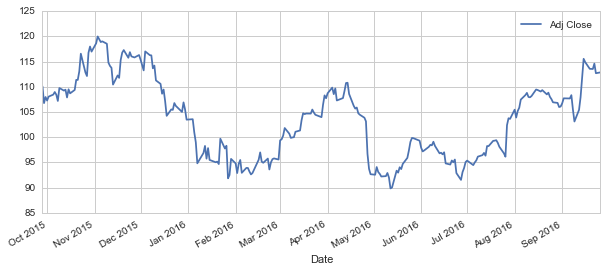

In [8]:
# A historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

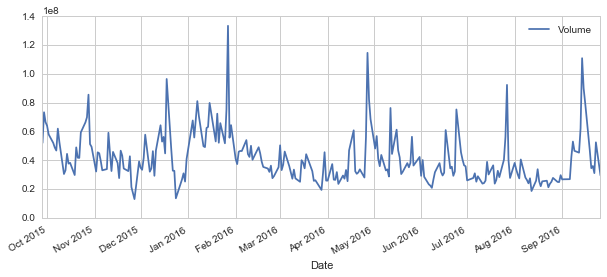

In [9]:
# Plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend='True',figsize=(10,4))

In [10]:
# Pandas has a built-in rolling mean calculator
# Plot out several moving averages
ma_day=[10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

D:\Program Files (x86)\ANACONDA\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
D:\Program Files (x86)\ANACONDA\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
D:\Program Files (x86)\ANACONDA\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


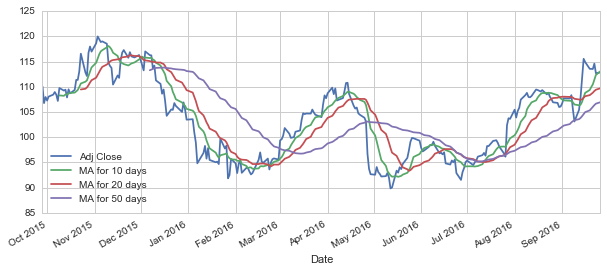

In [11]:
# Plot all the additional Moving Averages
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

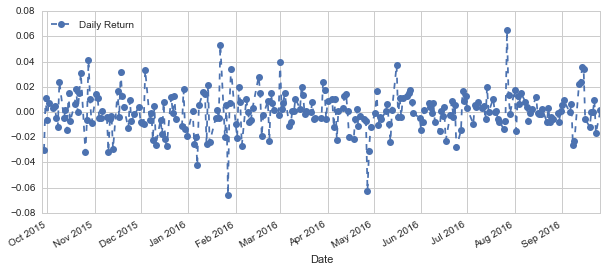

In [12]:
# 2.) What was the daily return of the stock on average?
# Use pct_change to find the percent change for each day
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()

# Plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker ='o')

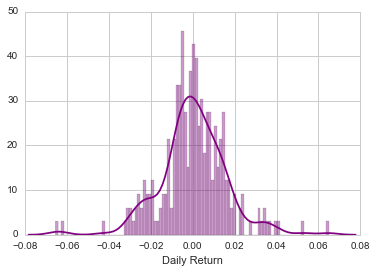

In [13]:
# use dropna() to delte the NaN values 
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist(bins=100)

In [16]:
# Analyze the returns of all the stocks in our list
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-28,110.086252,504.059998,594.890015,42.134480
2015-09-29,106.777002,496.070007,594.969971,42.280473
2015-09-30,107.991050,511.890015,608.419983,43.078585
2015-10-01,107.286121,520.719971,611.289978,43.419245
2015-10-02,108.069370,532.539978,626.909973,44.353619


In [17]:
# Get the daily return for all the stocks
tech_rets = closing_df.pct_change()

In [18]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-28,NaN,NaN,NaN,NaN
2015-09-29,-0.030061,-0.015851,0.000134,0.003465
2015-09-30,0.011370,0.031891,0.022606,0.018877
2015-10-01,-0.006528,0.017250,0.004717,0.007908
2015-10-02,0.007301,0.022699,0.025553,0.021520


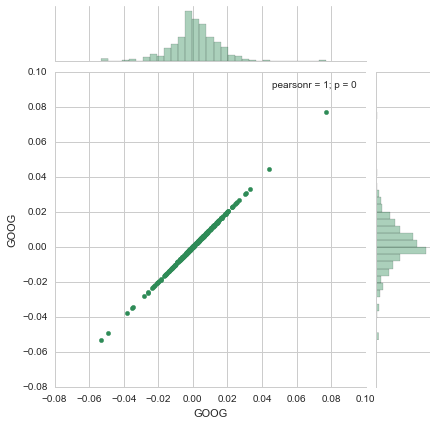

In [19]:
# Compare the daily percentage return of two stocks to check how correlated
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

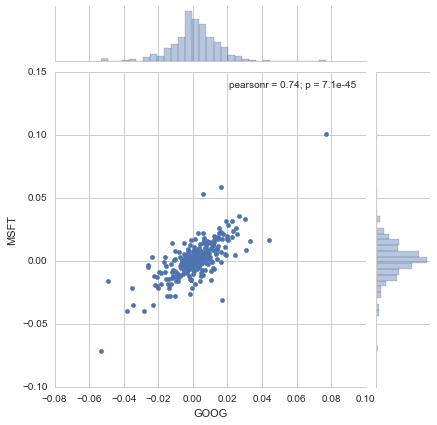

In [20]:
# Compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

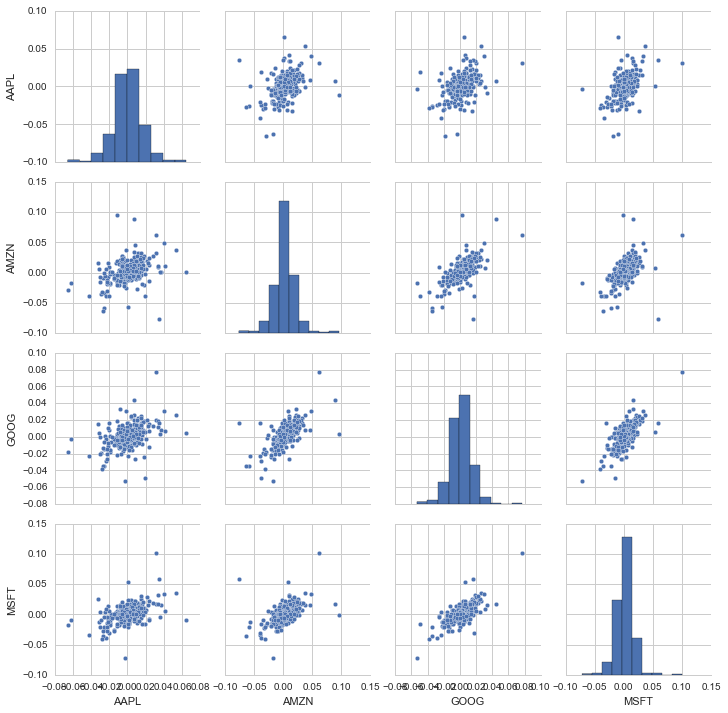

In [21]:
# Pairplot of all the comparisons
sns.pairplot(tech_rets.dropna())

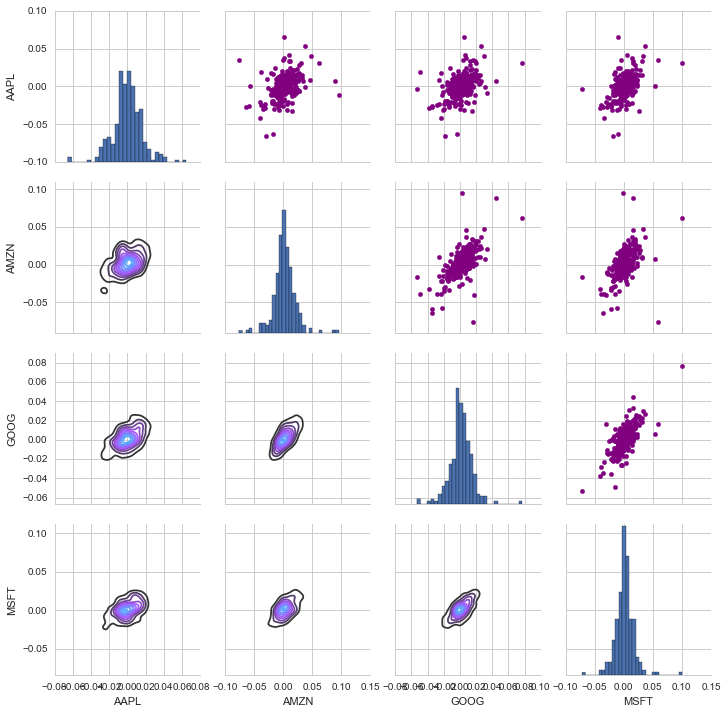

In [22]:
# Use sns.PairGrid() for full control of the figure,
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper to specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

# Using map_lower to define the lower triangle 
returns_fig.map_lower(sns.kdeplot,cmap ='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

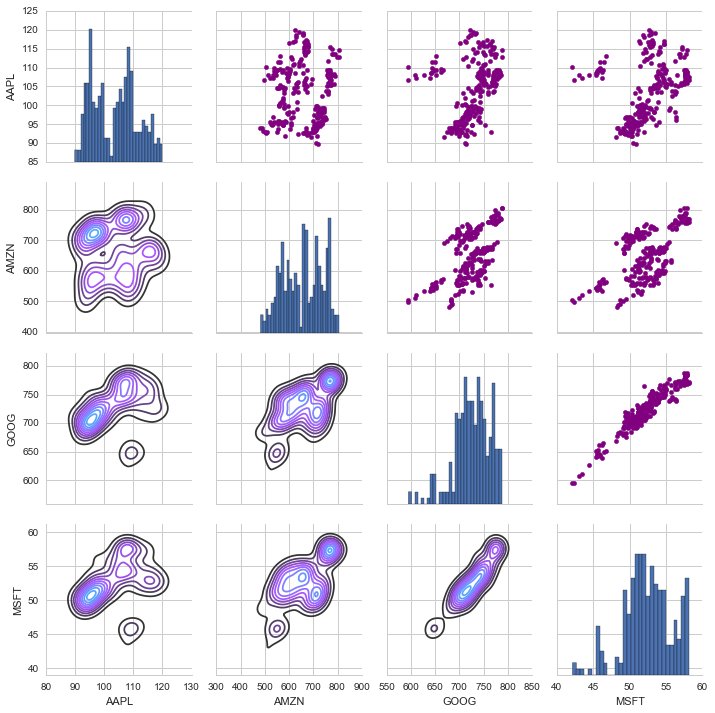

In [23]:
# Analyze the correlation of the closing prices 
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap ='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

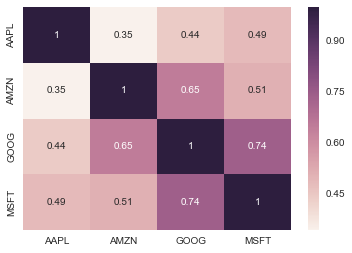

In [29]:
# the correlation between the stocks' daily return values
sns.heatmap(tech_rets.corr(),annot=True)

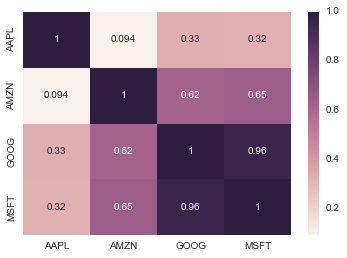

In [30]:
sns.heatmap(closing_df.corr(),annot=True)

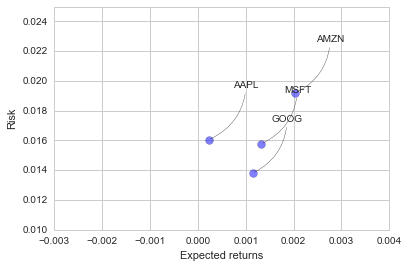

In [31]:
# Risk Analysis
# Basic way: comparing the expected return with the standard deviation of the daily returns
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot 
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

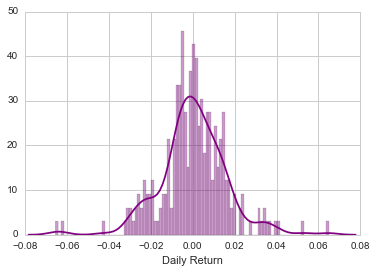

In [32]:
# Value at risk using the "bootstrap" method
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [33]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-29,-0.030061,-0.015851,0.000134,0.003465
2015-09-30,0.011370,0.031891,0.022606,0.018877
2015-10-01,-0.006528,0.017250,0.004717,0.007908
2015-10-02,0.007301,0.022699,0.025553,0.021520
2015-10-05,0.003624,0.020919,0.023225,0.023261


In [34]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.025724205412361145

In [35]:
# Value at Risk using the Monte Carlo method
# Set up time horizon and delta
days = 365
dt = 1/days

# Get mu (drift) from the expected return data for AAPL
mu = rets.mean()['GOOG']

# Get the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [38]:
# Create a function for data return
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [36]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-09-28,610.340027,614.604980,589.380005,594.890015,3127700,594.890015
2015-09-29,597.280029,605.000000,590.219971,594.969971,2309500,594.969971
2015-09-30,603.280029,608.760010,600.729980,608.419983,2413400,608.419983
2015-10-01,608.369995,612.090027,599.849976,611.289978,1867600,611.289978
2015-10-02,607.200012,627.340027,603.130005,626.909973,2684800,626.909973


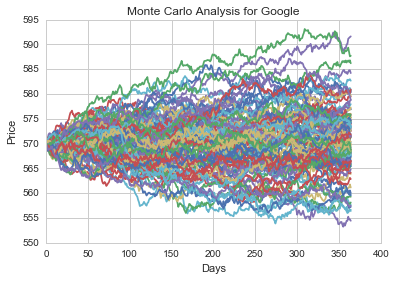

In [39]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [40]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

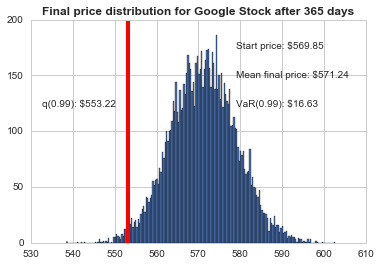

In [41]:
# Ddefine q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');